<a href="https://colab.research.google.com/github/amanashoksharmaji/Stock-Market-Forecasting-Using-LSTM-Model/blob/master/Use_LSTM_Model_To_Prediction_and_Forecasting_The_Stock_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install pandas==1.3.5

In [7]:
# !pip show pandas

In [8]:
pip install tensorflow>=2.0

In [9]:
# !pip show tensorflow

In [10]:
pip install keras>=2.0

In [11]:
# !pip show keras

In [12]:
!pip install pandas_datareader

In [13]:
# !pip show pandas_datareader

In [14]:
key="37b49aef65938e9441e897ba343ba45ac4c0b8cd"

In [15]:
### Data Collection and import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import pandas_datareader as pdr

In [16]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

/usr/local/lib/python3.10/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [17]:
df.to_csv('AAPL.csv')

In [18]:
df=pd.read_csv('AAPL.csv')

In [19]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2019-09-24 00:00:00+00:00,217.68,222.49,217.19,221.03,31434367,52.661975,53.825629,52.543433,53.472420,125737468,0.0,1.0
1,AAPL,2019-09-25 00:00:00+00:00,221.03,221.50,217.14,218.55,22481006,53.472420,53.586124,52.531336,52.872449,89924024,0.0,1.0
2,AAPL,2019-09-26 00:00:00+00:00,219.89,220.94,218.83,220.00,19088312,53.196627,53.450647,52.940188,53.223238,76353248,0.0,1.0
3,AAPL,2019-09-27 00:00:00+00:00,218.82,220.96,217.28,220.54,25361285,52.937768,53.455485,52.565206,53.353877,101445140,0.0,1.0
4,AAPL,2019-09-30 00:00:00+00:00,223.97,224.58,220.79,220.90,26318583,54.183676,54.331250,53.414358,53.440970,105274332,0.0,1.0


In [20]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2024-09-16 00:00:00+00:00,216.32,217.22,213.92,216.54,59357427,216.32,217.22,213.92,216.54,59357427,0.0,1.0
1253,AAPL,2024-09-17 00:00:00+00:00,216.79,216.90,214.50,215.75,45519339,216.79,216.90,214.50,215.75,45519339,0.0,1.0
1254,AAPL,2024-09-18 00:00:00+00:00,220.69,222.71,217.54,217.55,59894928,220.69,222.71,217.54,217.55,59894928,0.0,1.0
1255,AAPL,2024-09-19 00:00:00+00:00,228.87,229.82,224.63,224.99,66781315,228.87,229.82,224.63,224.99,66781315,0.0,1.0
1256,AAPL,2024-09-20 00:00:00+00:00,228.20,233.09,227.62,229.97,318679888,228.20,233.09,227.62,229.97,318679888,0.0,1.0


In [21]:
df1=df.reset_index()['close']

In [22]:
df1

,close
0,217.68
1,221.03
2,219.89
3,218.82
4,223.97
...,...
1252,216.32
1253,216.79
1254,220.69
1255,228.87


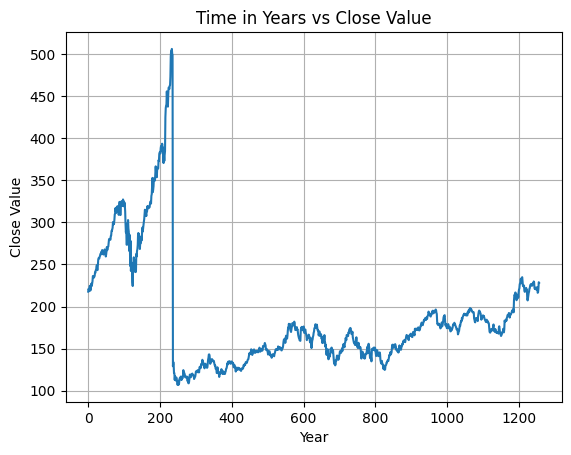

In [23]:
# Set title and labels
plt.title('Time in Years vs Close Value')
plt.xlabel('Year')
plt.ylabel('Close Value')
plt.grid(True)  # Add grid lines
plt.plot(df1)


In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [25]:
df1

array([[0.27762054],
       [0.28601127],
       [0.28315592],
       ...,
       [0.28515967],
       [0.30564809],
       [0.30396994]])

In [26]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [27]:
training_size,test_size

(817, 440)

In [28]:
train_data

array([[2.77620539e-01],
       [2.86011271e-01],
       [2.83155917e-01],
       [2.80475892e-01],
       [2.93375078e-01],
       [2.94927990e-01],
       [2.80826550e-01],
       [2.85485285e-01],
       [3.00989355e-01],
       [3.01114590e-01],
       [2.94452098e-01],
       [3.01039449e-01],
       [3.08703820e-01],
       [3.24032561e-01],
       [3.23180964e-01],
       [3.21803381e-01],
       [3.19423920e-01],
       [3.21703193e-01],
       [3.24533500e-01],
       [3.34802755e-01],
       [3.33425172e-01],
       [3.41490294e-01],
       [3.42492173e-01],
       [3.50006262e-01],
       [3.56192862e-01],
       [3.41765811e-01],
       [3.41690670e-01],
       [3.55466500e-01],
       [3.73149656e-01],
       [3.77357545e-01],
       [3.76430808e-01],
       [3.76706324e-01],
       [3.82191609e-01],
       [3.83969944e-01],
       [3.89129618e-01],
       [3.88528491e-01],
       [3.94815279e-01],
       [3.90231684e-01],
       [3.98046337e-01],
       [4.01402630e-01],


In [29]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [30]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [31]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [32]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [33]:
# reshape input to be [samples, time steps, features] which is required for LSTM (3D)
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [34]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [35]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 281ms/step - loss: 0.0436 - val_loss: 0.0030
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 203ms/step - loss: 0.0155 - val_loss: 4.4055e-04
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 187ms/step - loss: 0.0118 - val_loss: 3.9316e-04
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 259ms/step - loss: 0.0072 - val_loss: 6.9881e-04
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 172ms/step - loss: 0.0087 - val_loss: 3.7124e-04
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 169ms/step - loss: 0.0090 - val_loss: 0.0032
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 168ms/step - loss: 0.0066 - val_loss: 3.6440e-04
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 196ms/step - loss: 0.0069 - val_loss: 5.0119e-04
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 245ms/step - loss: 0.0035 - val_loss: 9.5304e-04
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step - loss: 0.0047 - val_loss: 4.0130e-04
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 169ms/step - loss: 0.0031 - val_loss: 0.0010
Epoch 12

In [38]:
import tensorflow as tf
tf.__version__

'2.17.0'

In [39]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [40]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [41]:
## Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

197.13939107302687

In [42]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

186.76500979297813

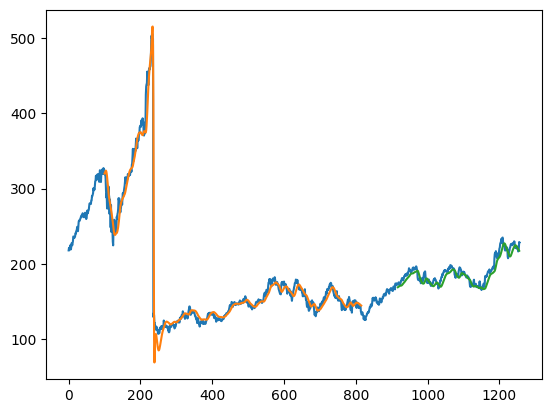

In [43]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [44]:
len(test_data)

440

In [45]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [46]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [47]:
temp_input

[0.15902316844082653,
 0.1564433312460864,
 0.16578584846587346,
 0.19170945522855348,
 0.1875266123982467,
 0.189254852849092,
 0.19010644959298684,
 0.1946900438321853,
 0.19088290544771447,
 0.19897307451471502,
 0.20185347526612396,
 0.207589229805886,
 0.20788979336255475,
 0.20796493425172197,
 0.2108954289292423,
 0.21417658108954285,
 0.2105447714464621,
 0.2004758922980588,
 0.20824045084533493,
 0.2082654978083907,
 0.20901690670006257,
 0.2115216030056355,
 0.21392611145898555,
 0.2183844708829054,
 0.2191859737006887,
 0.22299311208515965,
 0.21951158422041323,
 0.22554790231684402,
 0.216105197244834,
 0.25124608641202256,
 0.2660738885410144,
 0.26900438321853476,
 0.2646211646837821,
 0.275090795241077,
 0.26912961803381336,
 0.2575829680651221,
 0.25209768315591735,
 0.25372573575453966,
 0.25605510331872255,
 0.26652473387601744,
 0.26865372573575447,
 0.2599373825923606,
 0.27529117094552286,
 0.2841077019411396,
 0.287313713212273,
 0.29931120851596743,
 0.3030181590

In [48]:
# demonstrate prediction for next 60 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<60):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.27627128]
101
1 day input [0.15644333 0.16578585 0.19170946 0.18752661 0.18925485 0.19010645
 0.19469004 0.19088291 0.19897307 0.20185348 0.20758923 0.20788979
 0.20796493 0.21089543 0.21417658 0.21054477 0.20047589 0.20824045
 0.2082655  0.20901691 0.2115216  0.21392611 0.21838447 0.21918597
 0.22299311 0.21951158 0.2255479  0.2161052  0.25124609 0.26607389
 0.26900438 0.26462116 0.2750908  0.26912962 0.25758297 0.25209768
 0.25372574 0.2560551  0.26652473 0.26865373 0.25993738 0.27529117
 0.2841077  0.28731371 0.29931121 0.30301816 0.3051722  0.31594239
 0.30239198 0.30983093 0.31949906 0.32055103 0.30567314 0.29390106
 0.29422668 0.29335003 0.29597996 0.27977458 0.27714465 0.27832185
 0.27902317 0.2804258  0.2886412  0.27932373 0.28308078 0.25655604
 0.25144646 0.25793363 0.26667502 0.27401378 0.27724483 0.2866124
 0.28773951 0.2952536  0.29858485 0.2981841  0.29973701 0.29946149
 0.29477771 0.30056356 0.30141515 0.30354415 0.29968691 0.30795241
 0.3059737  0.29036944 0.28556043 

In [49]:
day_new=np.arange(1,101)
day_pred=np.arange(101,161)

In [50]:
len(df1)

1257

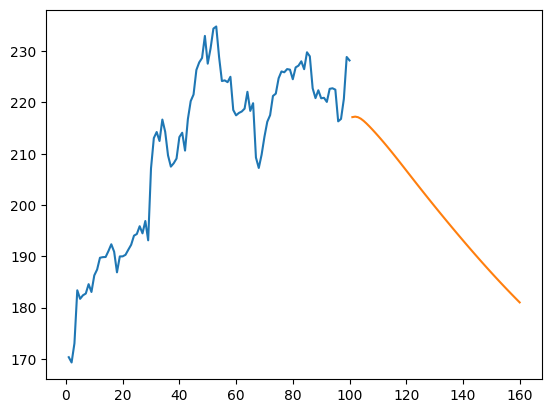

In [51]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

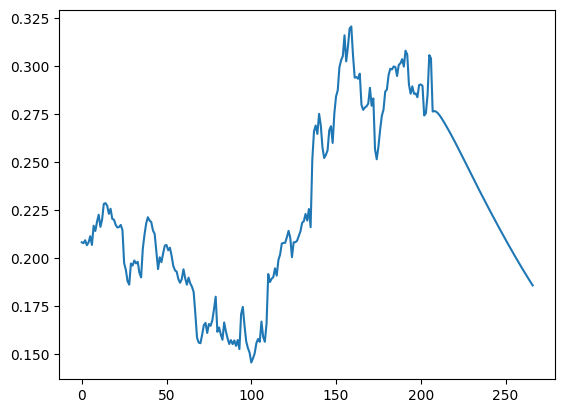

In [52]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1050:])

In [53]:
df3=scaler.inverse_transform(df3).tolist()

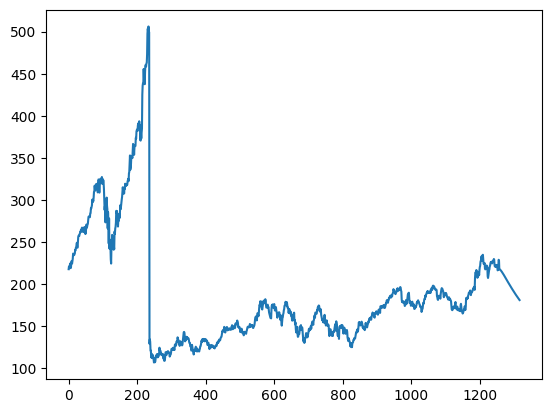

In [54]:
plt.plot(df3)